# Week Mini-Project: Goodreads Recommender System

# 1. Download the Dataset

Method 1 \
Download the dataset from the following link: \
https://www.kaggle.com/jealousleopard/goodreadsbooks/download

# 2. Read the Dataset

Read the dataset into a Pandas Dataframe!

In [1]:
# Just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df = pd.read_csv('books.csv', error_bad_lines = False)

df.shape

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


(11123, 12)

In [3]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
# I can see the the different languages available in the list using groupby
df.groupby(['language_code']).count()

,bookID,title,authors,average_rating,isbn,isbn13,num_pages,ratings_count,text_reviews_count,publication_date,publisher
language_code,,,,,,,,,,,
ale,1,1,1,1,1,1,1,1,1,1,1
ara,1,1,1,1,1,1,1,1,1,1,1
en-CA,7,7,7,7,7,7,7,7,7,7,7
en-GB,214,214,214,214,214,214,214,214,214,214,214
en-US,1408,1408,1408,1408,1408,1408,1408,1408,1408,1408,1408
eng,8908,8908,8908,8908,8908,8908,8908,8908,8908,8908,8908
enm,3,3,3,3,3,3,3,3,3,3,3
fre,144,144,144,144,144,144,144,144,144,144,144
ger,99,99,99,99,99,99,99,99,99,99,99


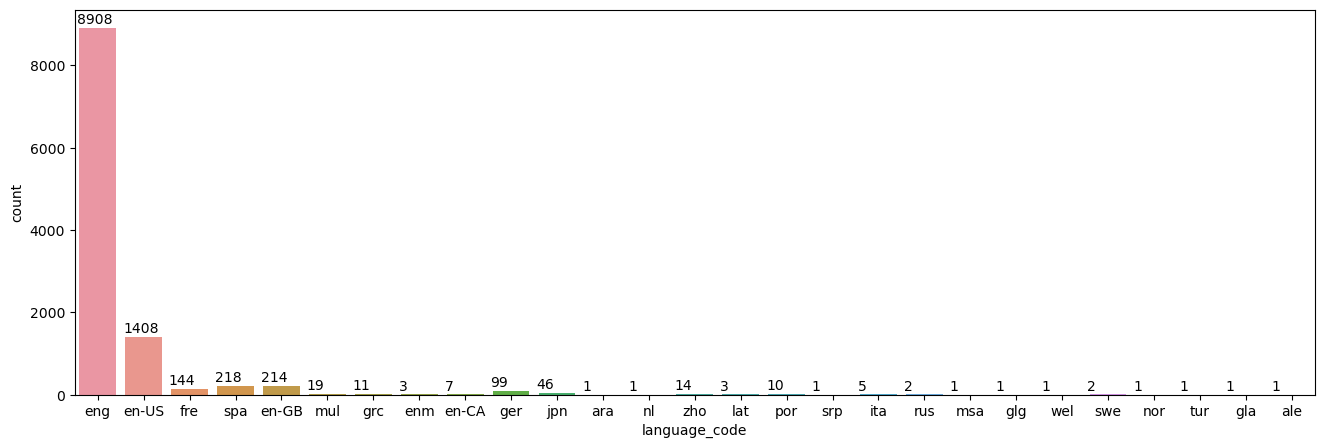

In [5]:
#alternatively using a countplot

import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(16,5))
language_count = sn.countplot(x = df.language_code, data = df)
for i in language_count.patches:
    language_count.annotate(str(i.get_height()), (i.get_x()-0.05, i.get_height()+100))

In [6]:
# Remove none-English titles and reset the index

df = df.loc[df['language_code'].isin(['eng', 'en-US', 'en-GB', 'en-CA'])].reset_index()
df

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10532,11117,45630,Whores for Gloria,William T. Vollmann,3.69,0140231579,9780140231571,en-US,160,932,111,2/1/1994,Penguin Books
10533,11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
10534,11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
10535,11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books


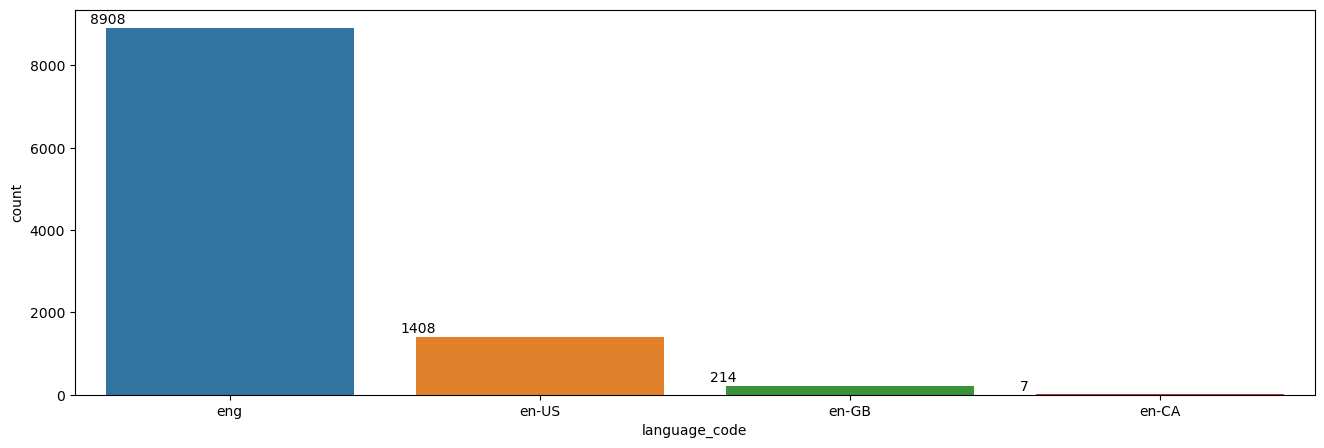

In [7]:
plt.figure(figsize=(16,5))
language_count = sn.countplot(x = df.language_code, data = df)
for i in language_count.patches:
    language_count.annotate(str(i.get_height()), (i.get_x()-0.05, i.get_height()+100))

# 3. Popularity-based Recommender

Create a function named Popularity Recommender and use it to recommend books based on popularity.
Use a weighted rank similar to that used in the IMDB rating example in Lesson 2.

![alt_text](IMDB.jpg 'IMDB Calculation')

P.S. You can inset a picture in the Notebook as seen here!

In [8]:
'''
Define a function  named Popularity Recommender that is used to recommend books based on popularity. 
The function uses a weighted ranking based on the IMDB's formula 
'''

def popularityRecommender(df):
    # Define the minimum vote count
    min_ratings_count = 0.75 * df['ratings_count'].max()
    
    # Define C - the mean rating
    mean_rating = df['average_rating'].mean()
    
    print('Min Rating Count', min_ratings_count)
    
    print('Average Rating', mean_rating)
    
    df['weighted_rating'] = (((df['ratings_count']/(df['ratings_count'] + min_ratings_count)) * df['average_rating']) + 
                             ((min_ratings_count/(df['ratings_count'] + min_ratings_count)) * mean_rating))
    recommendations = df.sort_values(by = 'weighted_rating', ascending = False).head(5)
    
    return (recommendations)

In [9]:
top5 = popularityRecommender(df)
top5

Min Rating Count 3448249.5
Average Rating 3.931313466831142


,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,weighted_rating
3,3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,4.185444
0,0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,4.172746
1,1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,4.146071
4169,4415,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.,4.126539
23,23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt,4.094953


In [10]:
top5titles = top5['title'].values
print(top5titles)

['Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)'
 'Harry Potter and the Half-Blood Prince (Harry Potter  #6)'
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)'
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)'
 'The Fellowship of the Ring (The Lord of the Rings  #1)']


# 4. Content-based Recommender

Create a function named Content-based Recommender and use it to recommend books based on content.


In [11]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
# Stop words are words that add no contexual meaning
tfidf=TfidfVectorizer(stop_words='english')

# Create the TF-IDF matrix
tfidf_matrix=tfidf.fit_transform(df['title'])

tfidf_matrix.shape

(10537, 10185)

In [13]:
# Calculate the distance between each title vecotr
distance_matrix = linear_kernel(tfidf_matrix)

# Recreate indices after removing any duplicate titles. Titles become the indices
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [14]:
indices

title
Harry Potter and the Half-Blood Prince (Harry Potter  #6)           0
Harry Potter and the Order of the Phoenix (Harry Potter  #5)        1
Harry Potter and the Chamber of Secrets (Harry Potter  #2)          2
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)         3
Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5)              4
                                                                ...  
Whores for Gloria                                               10532
Expelled from Eden: A William T. Vollmann Reader                10533
You Bright and Risen Angels                                     10534
The Ice-Shirt (Seven Dreams #1)                                 10535
Poor People                                                     10536
Length: 10537, dtype: int64

In [15]:
distance_matrix.size

111028369

In [16]:
'''
Define a function that takes the re-indexed dataset, finds the 6 most similar titles 
to a chosen title based on the similarity of the words in the titles,
and returns the top 5, (not) including itself, which will be the best match. 
'''

def ContentBasedRecommender(title, indices, distance_matrix):
    id_ = indices[title] #Fetch the index of the book title we will enter
    
    #List of tuples with distance for each item to the entered title (2 cols = id and distance)
    distances = list(enumerate(distance_matrix[id_])) 
    
    #sort by the distance function, which is in column[1]
    distances = sorted(distances, key=lambda x: x[1], reverse = True) 
    
    # Get the 5 best scores , not including itself
    distances = distances[1:6]
    
    # get the indices of the top 5
    recommendations = [distance[0] for distance in distances] 
    
    # return those recommendation names by pulling title from the given 5 indices
    return df['title'].iloc[recommendations] 

In [17]:
#Pick a title and see the resulting recommendations:
ContentBasedRecommender("Poor People", indices,distance_matrix)

7292                  The Book of Other People
2872    The Working Poor: Invisible in America
3265                            All New People
9017                       A Man of the People
212              We Were Not Like Other People
Name: title, dtype: object

In [18]:
#Pick another title and see the resulting recommendations:
ContentBasedRecommender("Expelled from Eden: A William T. Vollmann Reader", indices,distance_matrix)

2315                 This Other Eden
7089                            Eden
2325    Who Was William Shakespeare?
5268                    West To Eden
1203                    East of Eden
Name: title, dtype: object

# 5. TF-IDF Vectorizer
Use TF-IDF Vectorizer on the author data for each book.


In [19]:
# Stop words are words that add no contexual meaning
tfidf=TfidfVectorizer(stop_words='english')

# Create the TF-IDF matrix
tfidf_matrix=tfidf.fit_transform(df['authors'])

tfidf_matrix.shape

(10537, 8117)

# 6. Distance matrix
Choose cosine similarity for pairwise distances comparison

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
# Calculate the distance between each title vecotr
distance_matrix = cosine_similarity(tfidf_matrix)

# Recreate indices after removing any duplicate titles. Titles become the indices
df = df.drop_duplicates(subset = 'authors')
indices = pd.Series(df.index, index=df['authors'])

# using drop_duplicates with the pd.Series doesn't remove the duplicates??

In [22]:
indices

authors
J.K. Rowling/Mary GrandPré                                    0
J.K. Rowling                                                  2
W. Frederick Zimmerman                                        5
Douglas Adams                                                 7
Douglas Adams/Stephen Fry                                    10
                                                          ...  
Sam R. Watkins                                            10527
Alexander Hunter                                          10528
David Wood/Roald Dahl                                     10529
Dave Crane/Eric Pascarello/Darren James                   10531
William T. Vollmann/Larry McCaffery/Michael Hemmingson    10533
Length: 6359, dtype: int64

In [23]:
'''
Define a function that takes the re-indexed dataset, finds the 6 most similar Authors 
to a chosen title based on the similarity of the words in the Authors' names,
and returns the top 5, (not) including itself, which will be the best match. 
'''

def ContentBasedAuhterRecommender(author, indices, distance_matrix):
    id_ = indices[author] #Fetch the index of the book author we will enter
    
    #List of tuples with distance for each item to the entered title (2 cols = id and distance)
    distances = list(enumerate(distance_matrix[id_])) 
    
    #sort by the distance function, which is in column[1]
    distances = sorted(distances, key=lambda x: x[1], reverse = True) 
    
    # Get the 5 best scores , not including itself
    distances = distances[1:6]
    
    # get the indices of the top 5
    recommendations = [distance[0] for distance in distances] 
    
    # return those recommendation names by pulling title from the given 5 indices
    return df['authors'].iloc[recommendations] 

In [24]:
#Pick a book author and see the resulting recommendations:
ContentBasedAuhterRecommender("J.R.R. Tolkien", indices,distance_matrix)

40      Edward P. Jones/Kevin R. Free
42                       Satyajit Das
936                Colleen McCullough
2358                       Andre Duza
2360         Kate Bornstein/Sara Quin
Name: authors, dtype: object